# Knapsack Problem solved with genetic algorithms

## Libraries imports

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random

## Data import

In [59]:
with open("dataset", "r+") as file:
    max_weight = int(file.readline())
    values = file.readline()
    weights = file.readline()
values = list(map(lambda x: int(x), str.split(values, ",")))
weights = list(map(lambda x: int(x), str.split(weights, ",")))

NUMBER_OF_ATTRIBUTES = len(values) 

## Build initial population

In [60]:
POPULATION = 100
generation = []

for index in range(POPULATION):
    individual = np.random.randint(2, size = NUMBER_OF_ATTRIBUTES)
    generation.append(individual)

## Genetic algorithms

In [61]:
def fitness(generation):
    number_of_individuals = len(generation)
    fitness = np.zeros(number_of_individuals)
    
    for individual_index in range(number_of_individuals):
        individual = generation[individual_index]
        total_value = 0
        total_cost = 0
        for individual_choice_index in range(len(individual)):
            if individual[individual_choice_index] != 0:
                total_value += values[individual_choice_index]
                total_cost += weights[individual_choice_index]
        
        if total_cost < max_weight:
            fitness[individual_index] = total_value
    
    # contains 0 if max weight is exceeded
    return fitness

def selection(generation, fitness, number_of_parents = 20):
    parents = []
    for parent_index in range(number_of_parents):
        best_fit_index = np.argmax(fitness)
        parents.append(generation[best_fit_index])
        fitness[best_fit_index] = -math.inf
        
    return np.array(parents)

def crossover(parents, number_of_offsprings = 20):
    parents_shape = parents.shape
    offsprings = np.zeros(parents_shape)
    
    crossover_point = int(parents_shape[1] / 2)
    for offspring_index in range(number_of_offsprings):
        first_parent = random.choice(parents)
        second_parent = random.choice(parents)
        offsprings[offspring_index][0:crossover_point] = first_parent[0:crossover_point]
        offsprings[offspring_index][crossover_point:] = second_parent[crossover_point:]
    
    return offsprings

def mutation(offsprings):
    number_of_attributes = offsprings.shape[1]
    
    mutation_threshold = 0.1
    for offspring_index in range(len(offsprings)):
        random_value = random.random()
        if random_value > mutation_threshold:
            chosen_attribute = random.randint(0, number_of_attributes - 1)
        
            if offsprings[offspring_index][chosen_attribute] == 0:
                offsprings[offspring_index][chosen_attribute] = 1
            else:
                offsprings[offspring_index][chosen_attribute] = 0
    return offsprings

def produce_new_generation(generation):
    generation_fitness = fitness(generation)
    parents = selection(generation, generation_fitness)
    offsprings = crossover(parents)
    mutants = mutation(offsprings)
    return np.concatenate([parents, mutants])

## Compute new generations

In [62]:
MAX_GENERATIONS = 100

max_fitness_history = []
mean_fitness_history = []

for index in range(MAX_GENERATIONS):
    generation = produce_new_generation(generation)
    last_generation_fitness = fitness(generation)
    max_fitness_history.append(np.max(last_generation_fitness))
    mean_fitness_history.append(np.mean(last_generation_fitness))

## Execution results

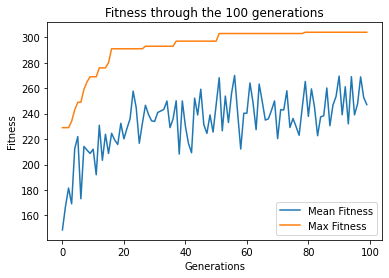

In [63]:
x_axis = np.linspace(0, MAX_GENERATIONS - 1, MAX_GENERATIONS)

plt.plot(x_axis, mean_fitness_history, label = 'Mean Fitness')
plt.plot(x_axis, max_fitness_history, label = 'Max Fitness')
plt.legend()
plt.title("Fitness through the {} generations".format(MAX_GENERATIONS))
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.show()